# Ensemble Learning

En este _notebook_ vamos a estudiar tres métodos de _Ensemble Learning_ que Scikit Learn implementa. Estos métodos son:

- Bagging
- Random Forests
- Boosting (AdaBoost)

La idea es entender cómo instanciar modelos que hacen uso de estas técnicas. Vamos a revisar primero cómo hacer Bagging en Scikit Learn.

## Bagging

Vamos a trabajar con la función `make_moons` de Scikit Learn para generar datos. Luego construiremos un clasificador que hace Bagging con 500 árboles de decisión.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Ejemplo basado en el libro Hands-On Machine Learning With Scikit Learn, Keras & Tensorflow

# Recordemos que random_state=42 nos permite que el programa siempre de los mismos resultados
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Aquí hacemos bagging: bootstrap=True es para hacer bagging, false es para pasting
# Estamos haciendo votar a 500 árboles de decisión
# Cada sampling captura 100 elementos
# En este caso los votos son "soft", porque pesan más los votos de los predictores que están más seguros
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

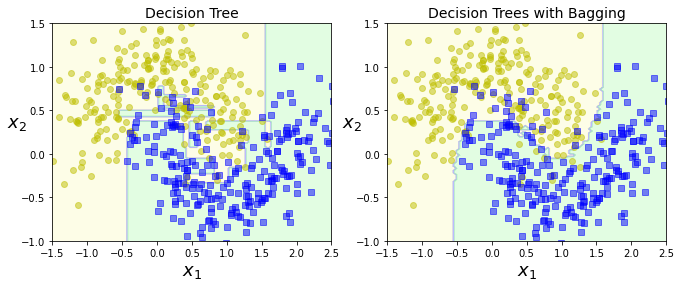

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
# Entrenamos un árbol de decisión normal para comparar
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
    
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)

plt.show()

Como vemos, es posible mejorar bastante el desempeño de la predicción si en vez de uno tenemos hartos árboles. Además, podemos hacer el cálculo de la evaluación _out-of-bag_. Para esto tenemos que entrenar de nuevo, señalando que queremos la evaluación oob.

In [12]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42, oob_score=True)
bag_clf.fit(X_train, y_train)

bag_clf.oob_score_

0.9253333333333333

Y también podemos ver el puntaje para cada uno de los elementos en el dataset.

In [13]:
bag_clf.oob_decision_function_

array([[0.35579515, 0.64420485],
       [0.43513514, 0.56486486],
       [1.        , 0.        ],
       [0.01030928, 0.98969072],
       [0.03174603, 0.96825397],
       [0.07672634, 0.92327366],
       [0.39189189, 0.60810811],
       [0.06145251, 0.93854749],
       [0.92689295, 0.07310705],
       [0.88205128, 0.11794872],
       [0.59850374, 0.40149626],
       [0.04896907, 0.95103093],
       [0.7565445 , 0.2434555 ],
       [0.81377551, 0.18622449],
       [0.88528678, 0.11471322],
       [0.07407407, 0.92592593],
       [0.04738155, 0.95261845],
       [0.92051282, 0.07948718],
       [0.69974555, 0.30025445],
       [0.94358974, 0.05641026],
       [0.06100796, 0.93899204],
       [0.224     , 0.776     ],
       [0.9125964 , 0.0874036 ],
       [0.98746867, 0.01253133],
       [0.95967742, 0.04032258],
       [0.        , 1.        ],
       [0.94255875, 0.05744125],
       [1.        , 0.        ],
       [0.03466667, 0.96533333],
       [0.7020202 , 0.2979798 ],
       [0.

Ahora vamos a ver que pasa con un _Random Forest_. Recordemos que la diferencia entre hacer _bagging_ y hacer un _random forest_ es que en el _random forest_ fijamos al azar las _features_ por las que podemos hacer _split_, y el número de _features_ a fijar es el mismo para todos los árboles.

## Random Forest

Vamos a ver cómo entrenar un predictor con el algoritmo _Random Forest_ en Scikit Learn.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

Y ahora una buena idea es comparar las predicciones del _Random Forest_ con nuesto `bag_clf`.

In [21]:
y_pred = bag_clf.predict(X_test)
y_pred_rf = rnd_clf.predict(X_test)

np.sum(y_pred == y_pred_rf) / len(y_pred)

0.976

Como vemos, las predicciones son casi idénticas. Finalmente, vamos a ver cómo podemos entrenar un predictor utilizando el algoritmo de _boosting_ **AdaBoost**.

## AdaBoost

En clases vimos cómo podíamos hacer un _strong learner_ a partir de _weak learners_ con el algoritmo AdaBoost. La versión que vimos era para clasificación binaria, sin embargo, AdaBoost tiene una versión multiclase llamada `SAMME`. Ahora vamos a entrenar un predictor AdaBoost basado en 200 _Decision Stumps_.

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5
)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

Y ahora veremos su frontera de decisión.

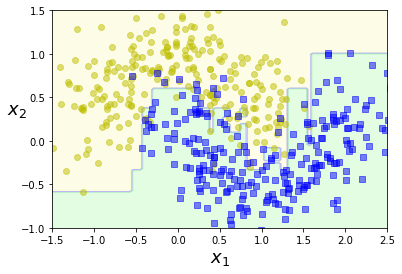

In [23]:
plot_decision_boundary(ada_clf, X, y)

Que no es tan sutil como la de un _Random Forest_, pero se ve bastante bien.